# <center>Sets de Entrenamiento y de Prueba</center>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# New Cars USA 2022/23 dataset
# https://www.kaggle.com/datasets/tymekurban/new-cars-usa-202223-dataset
autos_df = pd.read_csv('cars_us_2022.csv', usecols=['Brand','Body.Type','Power.hp','Height.in'])

# Eliminar filas con valores nulos
autos_df.dropna(subset=['Power.hp', 'Height.in'], inplace=True)
tipo_autos = ['Coupe','SUV']

# Filtrar a los tipo 'coupe' y 'suv'
autos_df = autos_df[autos_df['Body.Type'].isin(tipo_autos)]
autos_sliced_df = autos_df.iloc[400:950]
print("\n<<<<< Info final >>>>>")
print(autos_sliced_df.info())


<<<<< Info final >>>>>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 841 to 1754
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Brand      550 non-null    object 
 1   Body.Type  550 non-null    object 
 2   Power.hp   550 non-null    float64
 3   Height.in  550 non-null    float64
dtypes: float64(2), object(2)
memory usage: 21.5+ KB
None


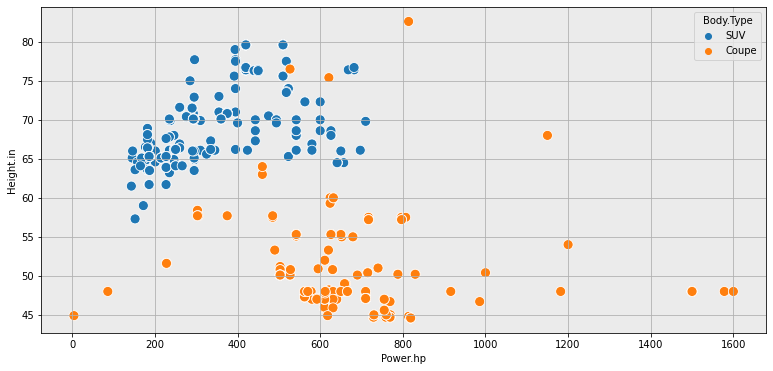

In [3]:
plt.figure(figsize=(13,6))
sns.set_style(rc = {'axes.facecolor': '#EBEBEB'})
sns.scatterplot(data=autos_sliced_df, x='Power.hp', y='Height.in', s=100, hue ='Body.Type')
plt.grid()
plt.show()

In [4]:
# Separar los datos en características y variable objetivo
X = autos_sliced_df[['Power.hp', 'Height.in']]
y = autos_sliced_df['Body.Type']

# Dividir los datos para Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo KNN 
modelo_knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el clasificador
modelo_knn.fit(X_train, y_train)

# Realizar predicciones.
predictions = modelo_knn.predict(X_test)

# Calcular los aciertos
accuracy = accuracy_score(y_test, predictions)
print(f'Precisión: {accuracy * 100:.2f}%')

Precisión: 98.18%


In [5]:
# Nuevo df con los datos de test y las predicciones
resultados_df = pd.DataFrame({'Power.hp': X_test['Power.hp'], 
                           'Height.in': X_test['Height.in'], 
                           'True': y_test, 
                            'Predicted': predictions}
                            )
resultados_df.head(10)

,Power.hp,Height.in,True,Predicted
1157,215.0,65.1,SUV,SUV
947,523.0,74.0,SUV,SUV
1672,916.0,48.0,Coupe,Coupe
988,510.0,79.6,SUV,SUV
1727,400.0,69.6,SUV,SUV
1737,266.0,64.1,SUV,SUV
952,395.0,74.0,SUV,SUV
1484,659.0,49.0,Coupe,Coupe
1017,290.0,71.5,SUV,SUV
1479,661.0,49.0,Coupe,Coupe


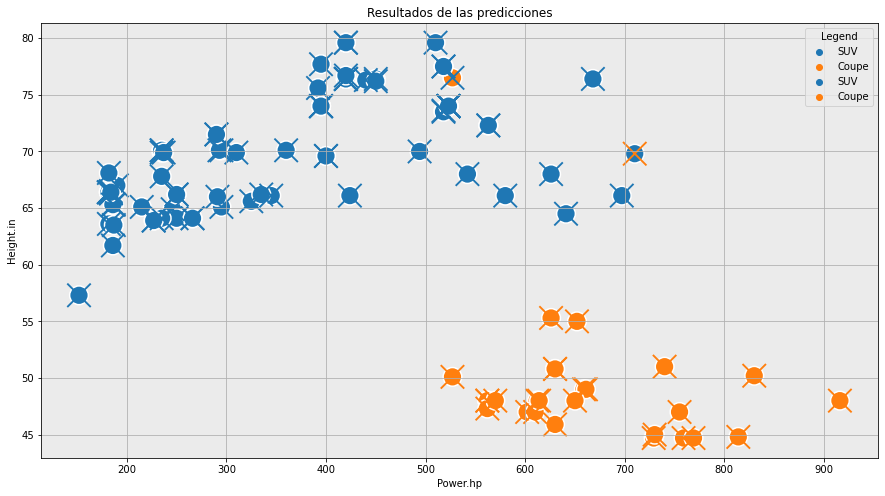

In [6]:
# Crear el gráfico
plt.figure(figsize=(15,8))
sns.set_style(rc = {'axes.facecolor': '#EBEBEB'})
sns.scatterplot(x='Power.hp', y='Height.in', hue='True', data=resultados_df, marker='o', s=350)
sns.scatterplot(x='Power.hp', y='Height.in', hue='Predicted', data=resultados_df, marker='x', s=550)

# Ajustar las etiquetas y el título
plt.xlabel('Power.hp')
plt.ylabel('Height.in')
plt.title('Resultados de las predicciones')
plt.legend(title='Legend',  bbox_to_anchor=(1, 1))
plt.grid()
# Show the plot
plt.show()

In [7]:
# Encontrar las filas que no coincidieron.
diferencias = resultados_df[resultados_df['True'] != resultados_df['Predicted']]
diferencias.head()

,Power.hp,Height.in,True,Predicted
1388,527.0,76.5,Coupe,SUV
1205,710.0,69.8,SUV,Coupe
